Authors: Antoine A. Ruzette, Simon F. Nørrelykke
Date: 2024-07-25

This notebook plots the spatial distribution of pixel intensity of cells in relation to a modelled stromal border. It is a minimal version of the spatial_combined version.

Contains the code to plot data from Ki67 images only. 

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import natsort
from matplotlib.ticker import ScalarFormatter

# colorblind-friendly colors
CB_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                '#f781bf', '#a65628', '#984ea3',
                '#999999', '#e41a1c', '#dede00']

## ML classifiers

### Load data

In [9]:
# ML-based classification

folder_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/ML_classifier/20240620_ML_intensity_features_normalized"

# Get a list of all CSV files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
file_paths = natsort.natsorted(file_paths)

# Specify the columns you want to load
columns_to_load = ['Classification', 
                   'DAPI: Nucleus: Median',
                   'KER_488: Cytoplasm: Median', 
                   'KI67_647: Nucleus: Mean', 
                   'KI67_647: Nucleus: Median', 
                   'KI67_647: Nucleus: Max', 
                   'FN_568: Cell: Median', 
                   'Nucleus: Area µm^2', 
                   'Signed distance to annotation Stroma µm']

# Read and filter each CSV file
dfs_ker488_ki67_647 = []
dfs_ker488 = []
all = []

for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path, usecols=columns_to_load)
    print(len(df))
    df_ker488_ki67_647 = df[df['Classification'] == 'KER+: KI67+']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Classification'] == 'KER+: KI67-']  # Filter rows by 'Class' for KER_488
    dfs_ker488_ki67_647.append(df_ker488_ki67_647)
    dfs_ker488.append(df_ker488)
    all.append(df)

# Concatenate all filtered datasets
ker_ki67_data = pd.concat(dfs_ker488_ki67_647, ignore_index=True)
ker_data = pd.concat(dfs_ker488, ignore_index=True)
all_ML = pd.concat(all, ignore_index=True)

/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/ML_classifier/20240620_ML_intensity_features_normalized/Image_SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.csv
272961
/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/ML_classifier/20240620_ML_intensity_features_normalized/Image_SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.csv
95389
/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/ML_classifier/20240620_ML_intensity_features_normalized/Image_SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.csv
154157
/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/ML_classifier/20240620_ML_intensity_features_normalized/Image_SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.csv
306898
/Users/antoine/Harvard/IAC/NinaKozlova/202404

### Plots with labels

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/834386414.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/834386414.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/834386414.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

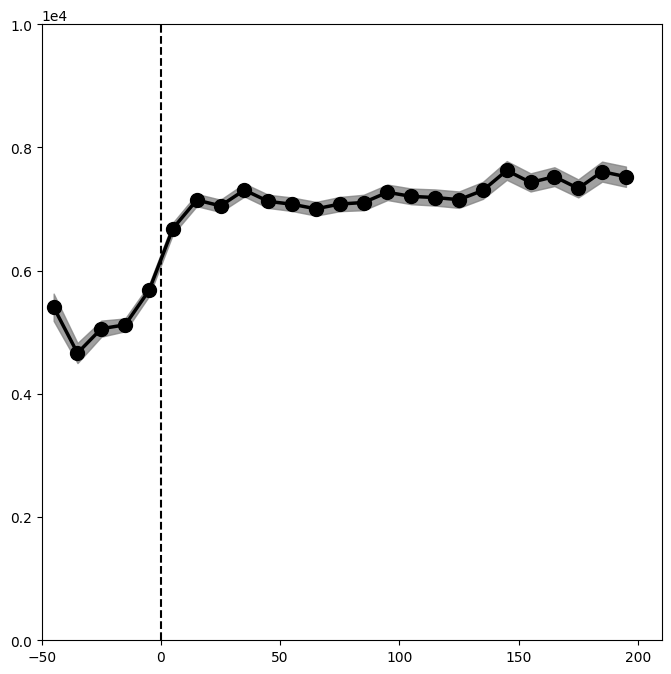

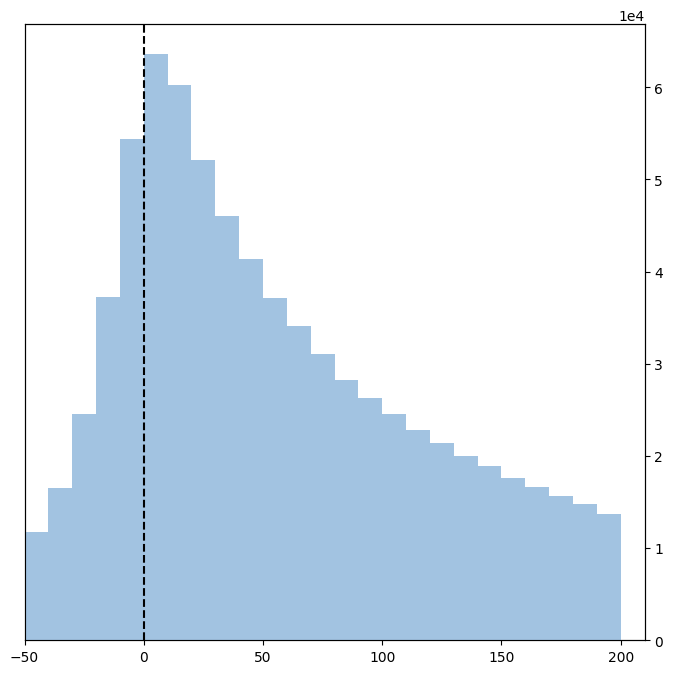

In [56]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -50
max_dist = 210

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_ki67_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_ki67_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].mean()
std_error_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = min_dist, max_dist
y_min, y_max = 0, 10000

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=10, alpha=1, linewidth=2.5)
ax1.tick_params(axis='y', which='both', labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')
# Save and display the plot
plt.savefig(f"{output_path}/KI67_signal_with_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False)
ax2.set_xlim(ax1.get_xlim())

# Adjust other plot settings as needed
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')
plt.xlim([min_dist, max_dist])

# Save and display the plot
plt.savefig(f"{output_path}/Ki67_cell_count_with_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

### Plots without labels

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/636726003.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/636726003.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_97589/636726003.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

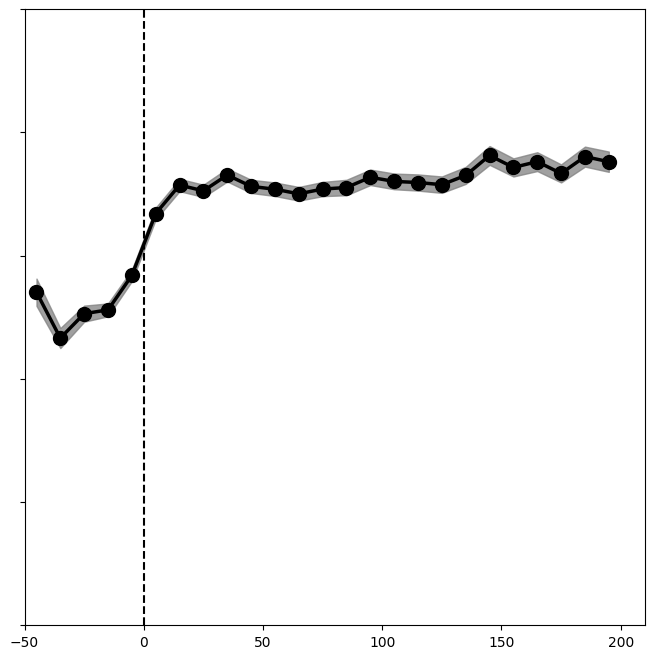

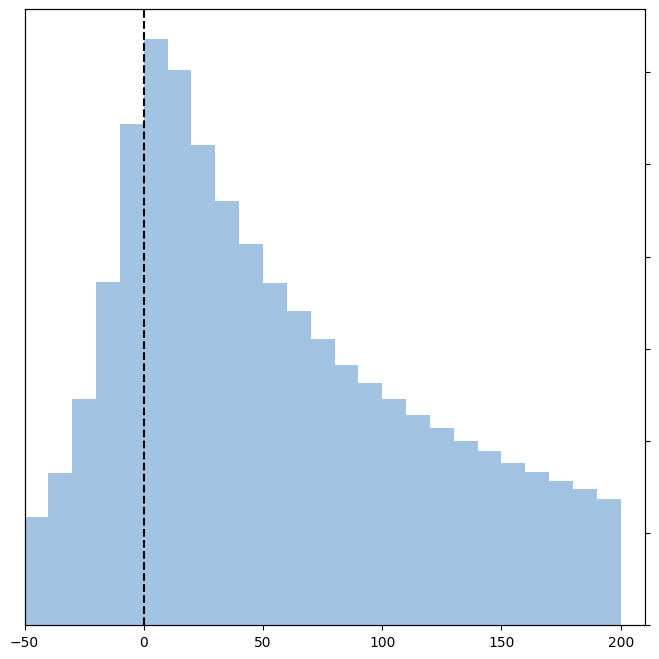

In [57]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -50
max_dist = 210

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_ki67_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_ki67_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].mean()
std_error_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = min_dist, max_dist
y_min, y_max = 0, 10000

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=10, alpha=1, linewidth=2.5)
ax1.tick_params(axis='y', which='both', labelleft=False, labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
plt.axvline(x=0, ls='--', color='black')
# Save and display the plot
plt.savefig(f"{output_path}/KI67_signal_without_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False, labelright=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False, labelright=False)
ax2.set_xlim(ax1.get_xlim())

# Adjust other plot settings as needed
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
plt.axvline(x=0, ls='--', color='black')
plt.xlim([min_dist, max_dist])

# Save and display the plot
plt.savefig(f"{output_path}/KI67_cell_count_without_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

### Full spatial plots with labels (supplementary)

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/4070490700.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/4070490700.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/4070490700.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

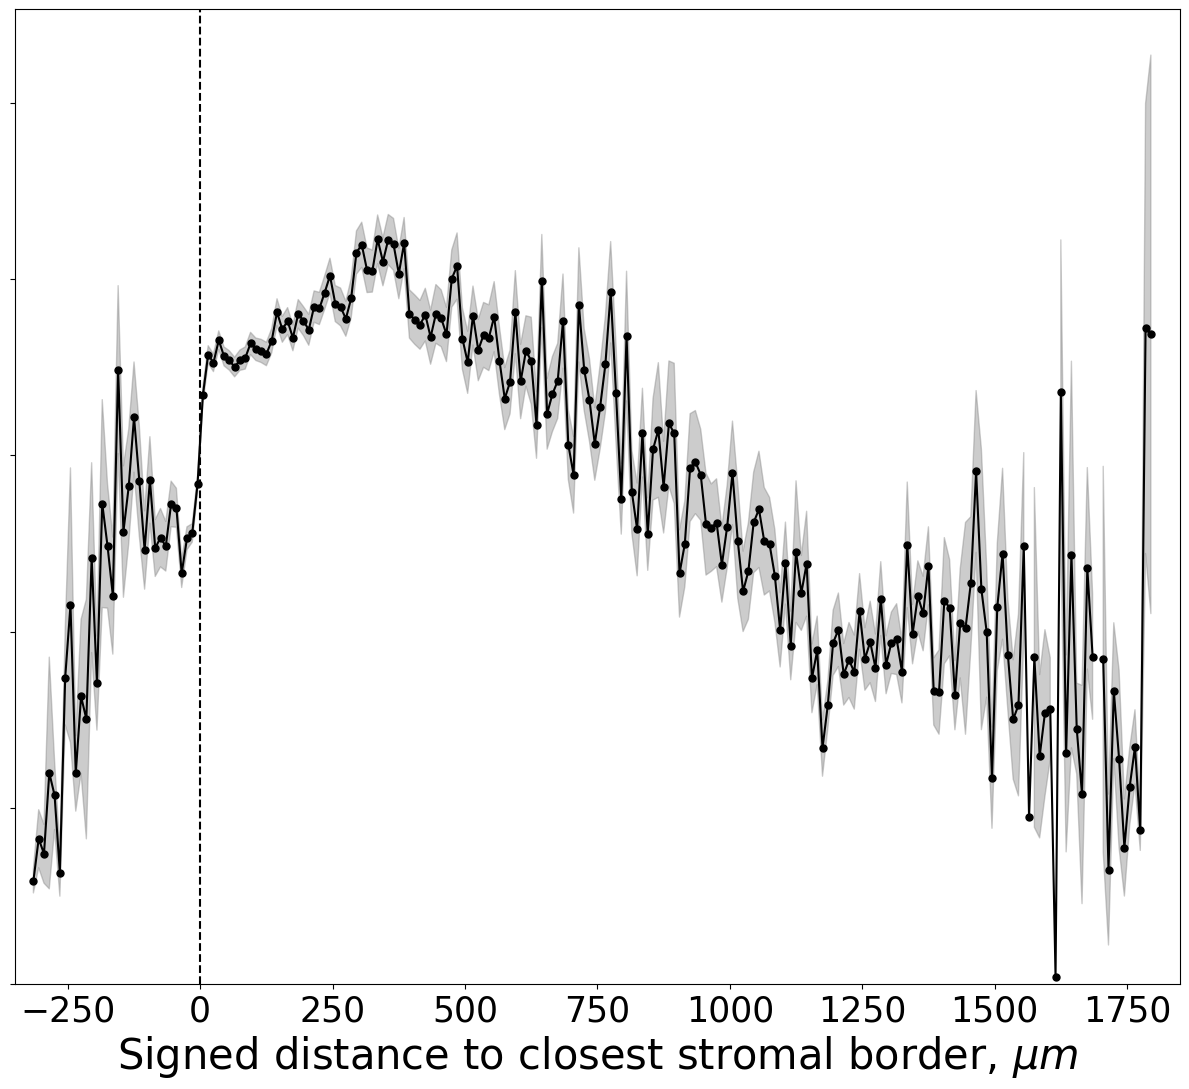

In [6]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist =int(np.min(ker_ki67_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker_ki67_data['Signed distance to annotation Stroma µm']))

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_ki67_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_ki67_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].mean()
std_error_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()


# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = abs(median_intensity_1.values - median_intensity_2.values)
# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

plt.figure(figsize=(12, 11))
#plt.xlim([min_dist, max_dist])
# plt.ylabel(r'Signal intensity, KI67', color='black', fontsize=30)
plt.axvline(x=0, ls='--', color='black')
plt.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='gray', alpha=0.4)
plt.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)
plt.ylim([0, None])
# plt.xlim([-550, 950])
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=30)
# Set the y-axis formatter to display scientific notation with a fixed number of decimals
plt.xlim([-350, 1850])

# Set the y-axis formatter to display scientific notation with a fixed number of decimals
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
plt.gca().yaxis.set_major_formatter(formatter)

# Increase font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='both', which='minor', labelsize=25)

# Add the exponent label to the top of the plot
plt.gca().yaxis.get_offset_text().set_size(25)
plt.gca().yaxis.get_offset_text().set_fontsize(25)
plt.gca().yaxis.get_offset_text().set_color('black')

# without labels
plt.tick_params(axis='y', which='both', labelleft=False)
plt.tick_params(axis='y', labelcolor='black')

plt.tight_layout()
plt.savefig(f"{output_path}/KI67_full_spatial_signal_without_labels", dpi=300, transparent=True)
plt.show()
plt.close()

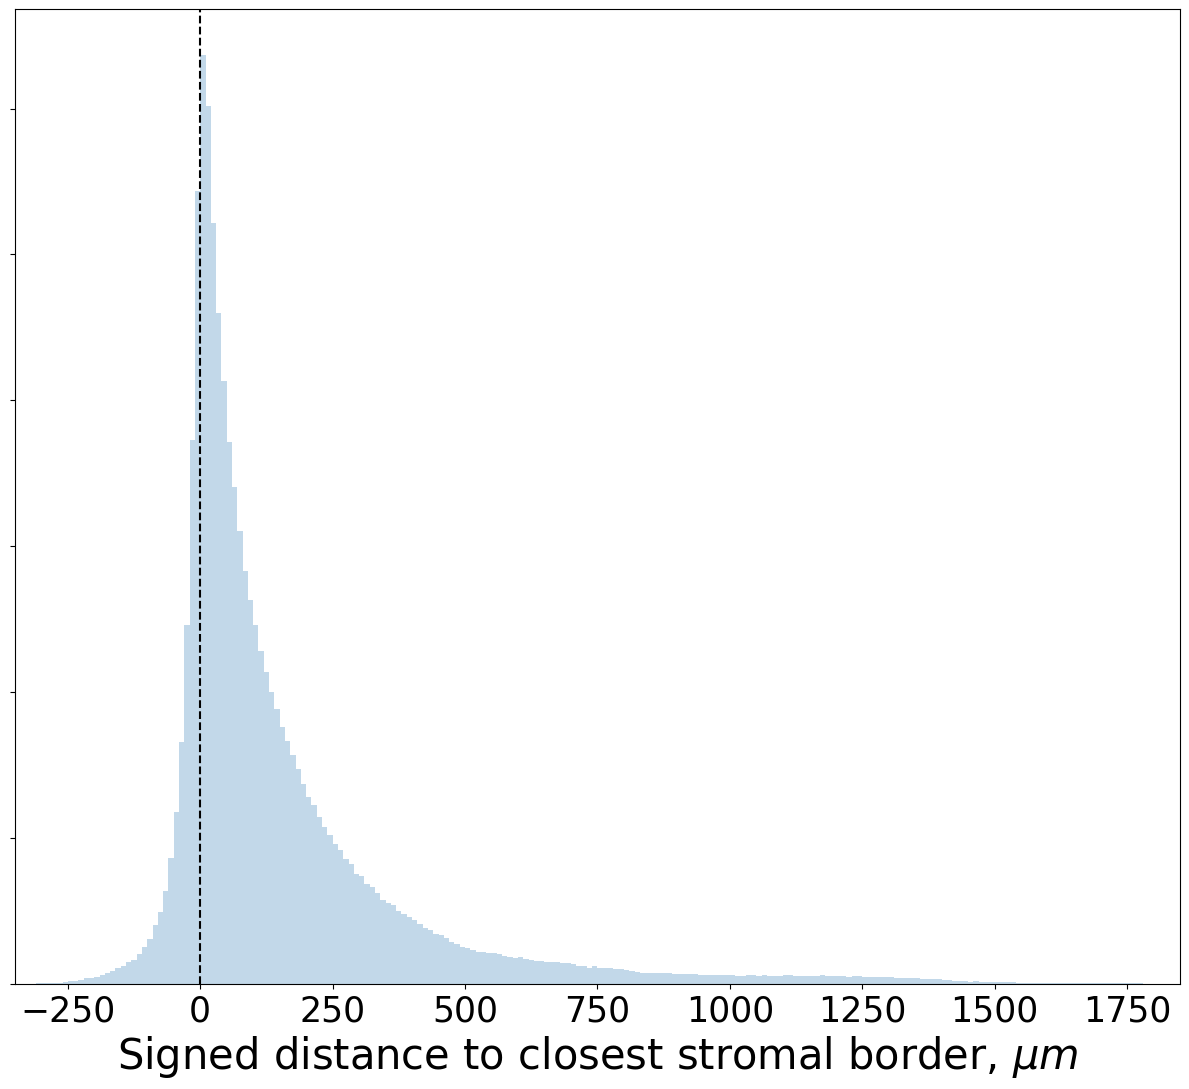

In [7]:
output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

plt.figure(figsize=(12, 11))
plt.xlim([min_dist, max_dist])
# plt.ylabel(r'Cell count, KI67', color='black', fontsize=30)
plt.axvline(x=0, ls='--', color='black')
plt.bar(bin_midpoints_1, combined_count, color='#377eb8', width=bin_size, align='center', alpha=0.3, label='Ki67+') # color='#f781bf',
#plt.ylim([0, None])
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=30)
plt.xlim([-350, 1850])

# Set the y-axis formatter to display scientific notation with a fixed number of decimals
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
plt.gca().yaxis.set_major_formatter(formatter)

# Increase font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='both', which='minor', labelsize=25)

# Add the exponent label to the top of the plot
plt.gca().yaxis.get_offset_text().set_size(25)
plt.gca().yaxis.get_offset_text().set_fontsize(25)
plt.gca().yaxis.get_offset_text().set_color('black')

# without labels
plt.tick_params(axis='y', which='both', labelleft=False)
plt.tick_params(axis='y', labelcolor='black')

plt.tight_layout()
plt.savefig(f"{output_path}/KI67_full_spatial_cell_count_without_labels", dpi=300, transparent=True)
plt.show()
plt.close()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/2252148319.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/2252148319.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/2252148319.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

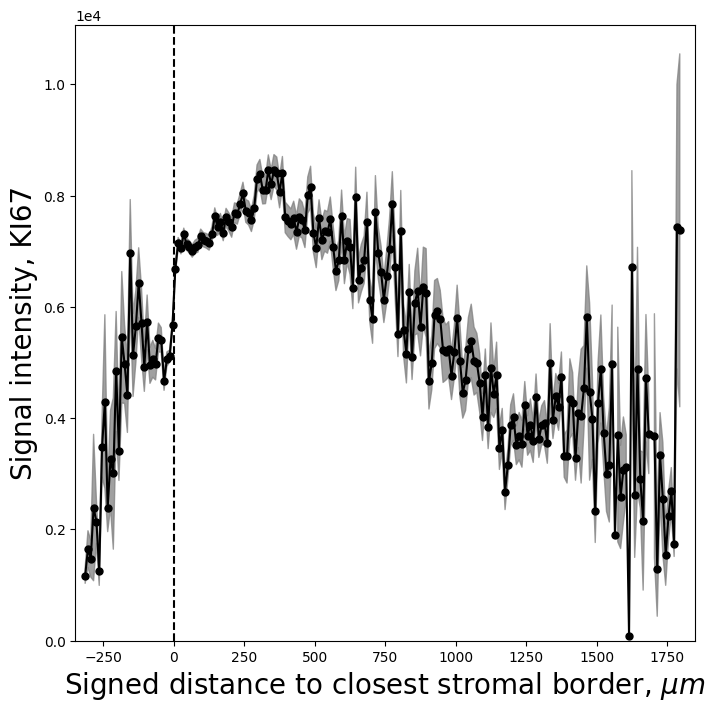

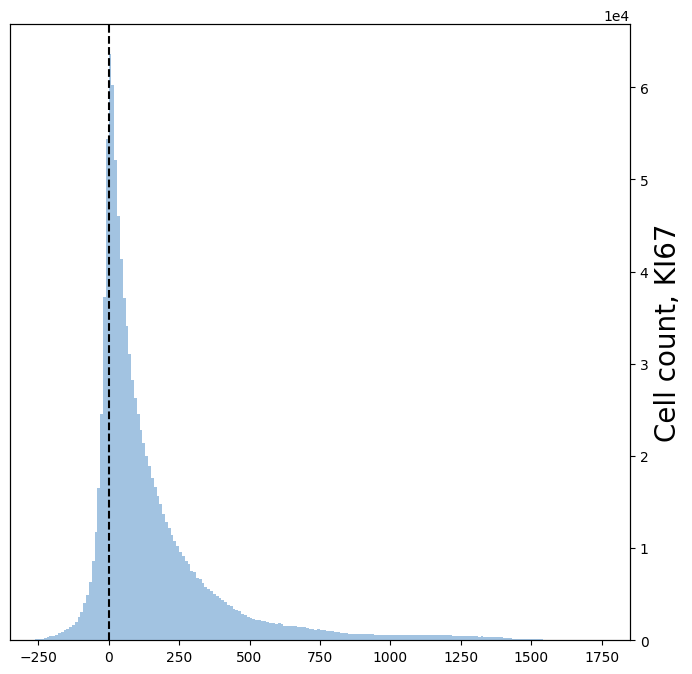

In [18]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist =int(np.min(ker_ki67_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker_ki67_data['Signed distance to annotation Stroma µm']))

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_ki67_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_ki67_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].mean()
std_error_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = -350, 1850
y_min, y_max = 0, None

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1, linewidth=1.5)
ax1.tick_params(axis='y', which='both', labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')
plt.ylabel(r'Signal intensity, KI67', color='black', fontsize=20)
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=20)


# Save and display the plot
plt.savefig(f"{output_path}/KI67_full_spatial_signal_with_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75, label='Ki67+')
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False)
ax2.set_xlim([x_min, x_max])
ax2.set_ylim([y_min, y_max])

# Adjust other plot settings as needed
ax2.set_ylabel(r'Cell count, KI67', color='black', fontsize=20)
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=20)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')

# Save and display the plot
plt.savefig(f"{output_path}/KI67_full_spatial_cell_count_with_labels", dpi=300, transparent=True)
plt.show()
plt.close()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/538278934.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/538278934.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_24607/538278934.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

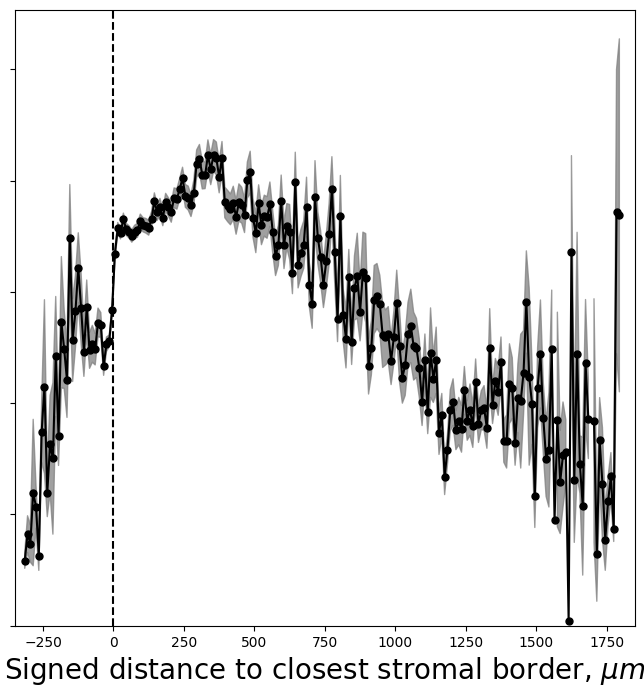

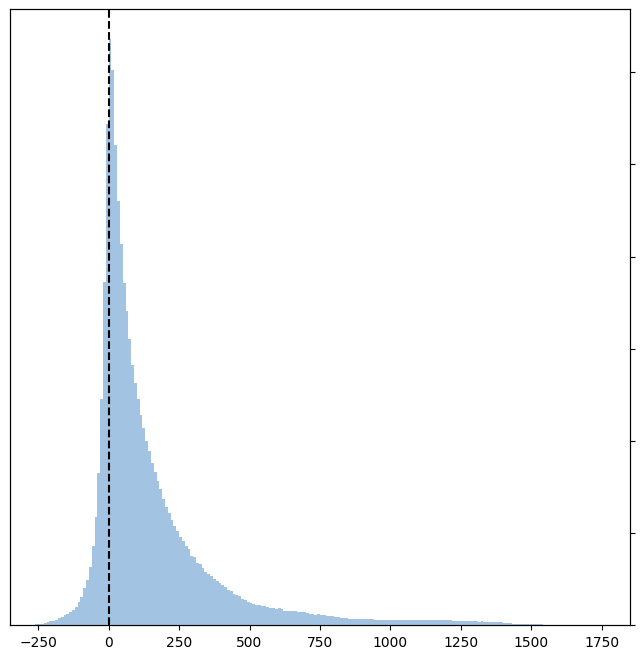

In [17]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist =int(np.min(ker_ki67_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker_ki67_data['Signed distance to annotation Stroma µm']))

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/plots/20240620_spatial_intensity_features_normalized"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_ki67_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].mean()
std_error_1 = ker_ki67_data.groupby(distance_bins_1)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_ki67_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].mean()
std_error_2 = ker_data.groupby(distance_bins_2)['KI67_647: Nucleus: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = -350, 1850
y_min, y_max = 0, None

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1, linewidth=1.5)
ax1.tick_params(axis='y', which='both', labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')
plt.ylabel(r'Signal intensity, KI67', color='black', fontsize=20)
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=20)
# Set the y-axis labels to an empty string to remove them
ax1.set_yticklabels([])
# Remove the y-axis label
ax1.set_ylabel('')

# Save and display the plot
plt.savefig(f"{output_path}/KI67_full_spatial_signal_without_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75, label='Ki67+')
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False)
ax2.set_xlim([x_min, x_max])
ax2.set_ylim([y_min, y_max])

# Adjust other plot settings as needed
ax2.set_ylabel(r'Cell count, KI67', color='black', fontsize=20)
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=20)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.axvline(x=0, ls='--', color='black')
# Set the y-axis labels to an empty string to remove them
ax2.set_yticklabels([])
# Remove the y-axis label
ax2.set_ylabel('')

# Save and display the plot
plt.savefig(f"{output_path}/KI67_full_spatial_cell_count_without_labels", dpi=300, transparent=True)
plt.show()
plt.close()